# imports

In [262]:
from useful_scit.imps import (
    pd,np,xr,za,mpl,plt,sns, pjoin, 
    os,glob,dt,sys,ucp,log, splot, crt,axsplot)
import re
import wrf_management.modules.util as wutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# code 

In [9]:
flx_path = '/homeappl/home/aliagadi/appl_taito/' +\
'FLEXPART-WRF_v3.3.2/readwind_nests.f90'

In [10]:
with open(flx_path, 'r') as op:
    txt = op.read()

In [34]:
_vars = re.findall(r'\ *?[^!\n]*?varname\ *=\ *\'(.+)\'',txt)

In [37]:
var = 'var'
df_v = pd.DataFrame(_vars,columns=[var])
df_v = df_v.sort_values(var).reset_index(drop=True)

In [101]:
df_v = df_v.drop_duplicates().copy()

## WRF files

In [41]:
wrf_path = \
'/proj/atm/saltena/runs/run_2019_05_15/' +\
'wrf/wrfout_d0*2018-03-08_*'

In [44]:
wrf_path = '/proj/atm/saltena/runs/run_2019_05_15/wrf/'

In [46]:
wrf_files = wutil.get_df_list(path=wrf_path)

In [86]:
_i = 1
_s = slice('2018-03-08 14','2018-03-08 16')
_wr = wrf_files.loc[(_s,_i),:]

In [89]:
p = _wr.iloc[0]['p']
_ds = xr.open_dataset(p)

In [177]:
var = 'var'

def _find_exists(r,ds):
    va = r['var']
    ret = False
    try: ds[va];ret=True
    except: pass
    return ret

def _find_dims(r,ds):
    va = r['var']
    ret = 0
    try: ret = len(ds[va].dims)
    except: pass
    return ret

def _find_time_dim(r,ds):
    va = r['var']
    ret = False
    try: ret = ('Time' in ds[va].dims)
    except: pass
    return ret
def _find_other_dim(r,ds):
    va = r['var']
    ret = False
    try: ret = list(set(list(ds[va].dims))-set(('Time',)))
    except: pass
    return ret

def _find_desc(r,ds):
    va = r['var']
    ret = False
    try: ret = ds[va].description
    except: pass
    return ret

In [178]:
exists = 'exists'
ndims = 'ndims'
tdim = 't_dim'
dims = 'dims'
desc = 'desc'

df_v[exists]=df_v.apply(lambda r: _find_exists(r,_ds),axis=1)
df_v[ndims]=df_v.apply(lambda r: _find_dims(r,_ds),axis=1)
df_v[tdim]=df_v.apply(lambda r: _find_time_dim(r,_ds),axis=1)
df_v[dims]=df_v.apply(lambda r: _find_other_dim(r,_ds),axis=1)
df_v[desc]=df_v.apply(lambda r: _find_desc(r,_ds),axis=1)

In [179]:
df_v1 = df_v[df_v[exists]]

In [155]:
df_v1

,var,exists,dims,t_dim,ndims,desc
3,CLDFRA,True,"{south_north, west_east, bottom_top}",True,4,CLOUD FRACTION
4,HFX,True,"{south_north, west_east}",True,3,UPWARD HEAT FLUX AT THE SURFACE
5,LU_INDEX,True,"{south_north, west_east}",True,3,LAND USE CATEGORY
6,MAPFAC_M,True,"{south_north, west_east}",True,3,Map scale factor on mass grid
7,MAPFAC_MX,True,"{south_north, west_east}",True,3,"Map scale factor on mass grid, x direction"
8,MAPFAC_MY,True,"{south_north, west_east}",True,3,"Map scale factor on mass grid, y direction"
9,MAPFAC_U,True,"{south_north, west_east_stag}",True,3,Map scale factor on u-grid
11,MAPFAC_V,True,"{west_east, south_north_stag}",True,3,Map scale factor on v-grid
14,MUB,True,"{south_north, west_east}",True,3,base state dry air mass in column
15,P,True,"{south_north, west_east, bottom_top}",True,4,perturbation pressure


In [429]:
_id = 1
_s = slice('2018-03-08 14','2018-03-08 15')
_wr = wrf_files.loc[(_s,_id),:]

XTIME = 'XTIME'
Time = 'Time'
wds = xr.open_mfdataset(_wr['p'],concat_dim=Time,combine='nested')
wds = wds.swap_dims({Time:XTIME})

In [431]:

df_v1
row = df_v1.iloc[12]
va = row[var]
_wd = wds[va]
_wds = _wd.shift(**{XTIME:-1})
va

'PH'

In [432]:
_der = _wds-_wd
_derAll = _der.loc[{XTIME:slice('2018-03-08 14:00','2018-03-08 14:30')}]
_derRes = _der.loc[{XTIME:slice('2018-03-08 14:45','2018-03-08 14:45')}]

In [433]:
derResult = _derRes.mean(XTIME)/(_derAll.mean(XTIME).where(
    np.abs(_derAll)>1e-1,1
))

In [ ]:
ax = axsplot()
_res = pd.Series(derResult.values.flatten()).dropna().values
description = pd.DataFrame(_res,columns=[va]).describe()
sns.distplot(_res,kde=False,ax=ax, label = va);
ax.legend()
ax.set_title(f'dom:{_id}-{row[desc]}')
ax.table(
    cellText=description.values,
    rowLabels=description.index.values,
    colLabels=[va],
    cellLoc='left',
    bbox=[1.2,0,.5,1]
        )

In [396]:
(_derAll.mean(XTIME).where(_derAll!=0,1)).max().values

array(48.512695, dtype=float32)

(array([7.95000e+02, 4.57500e+03, 1.00199e+05, 6.84103e+05, 5.81757e+05,
        1.02765e+05, 1.62210e+04, 1.13100e+03, 1.65000e+02, 3.90000e+01]),
 array([-27.085938 , -19.526073 , -11.966211 ,  -4.4063478,   3.1535156,
         10.713379 ,  18.273243 ,  25.833105 ,  33.392967 ,  40.95283  ,
         48.512695 ], dtype=float32),
 <a list of 10 Patch objects>)

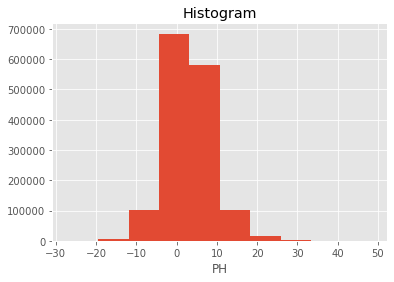

In [421]:
_derAll.mean(XTIME).where(~(_derAll==0),1).plot()

In [414]:
rr=((_derAll.mean(XTIME).where(_derAll!=0,1)).values==0).flatten().astype(int)

In [415]:
pd.Series(rr).value_counts()

0    1491732
1         18
dtype: int64

In [436]:
wds['UST'][{}]

<xarray.DataArray 'UST' (Time: 8, south_north: 85, west_east: 117)>
dask.array<shape=(8, 85, 117), dtype=float32, chunksize=(4, 85, 117)>
Coordinates:
    XLAT     (Time, south_north, west_east) float32 dask.array<shape=(8, 85, 117), chunksize=(4, 85, 117)>
    XLONG    (Time, south_north, west_east) float32 dask.array<shape=(8, 85, 117), chunksize=(4, 85, 117)>
    XTIME    (Time) datetime64[ns] dask.array<shape=(8,), chunksize=(4,)>
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  U* IN SIMILARITY THEORY
    units:        m s-1
    stagger:      

In [477]:
ucp.set_dpi(300)

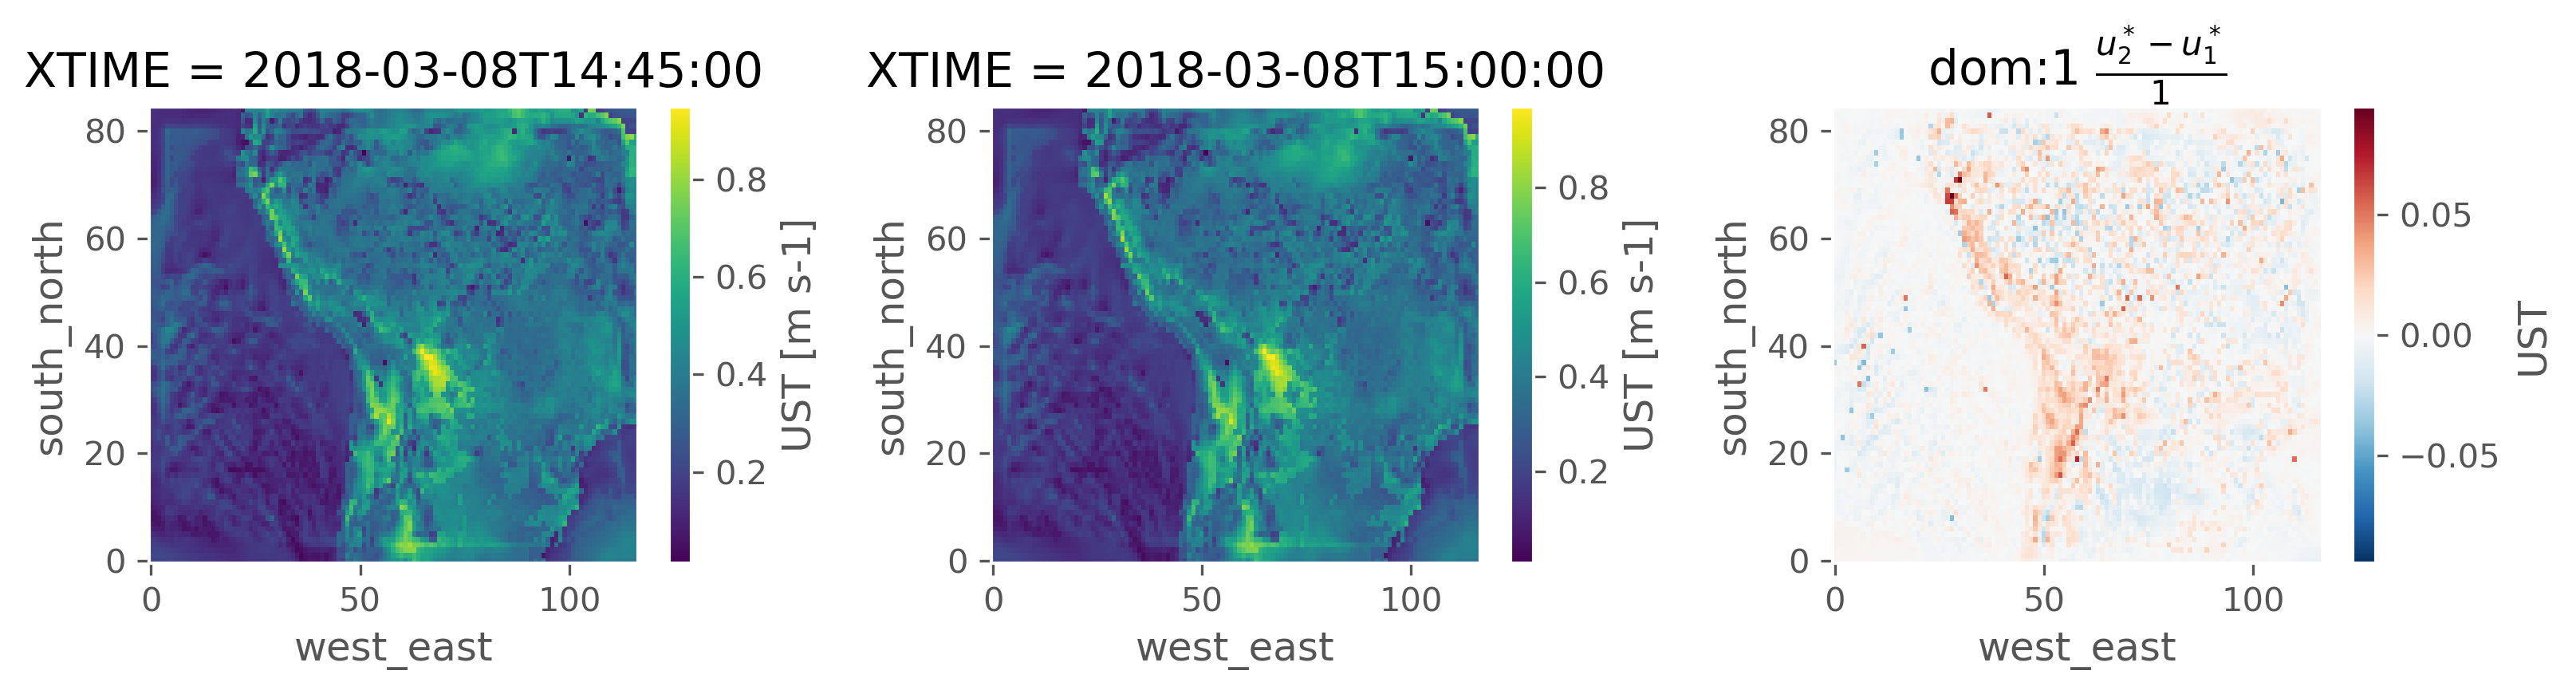

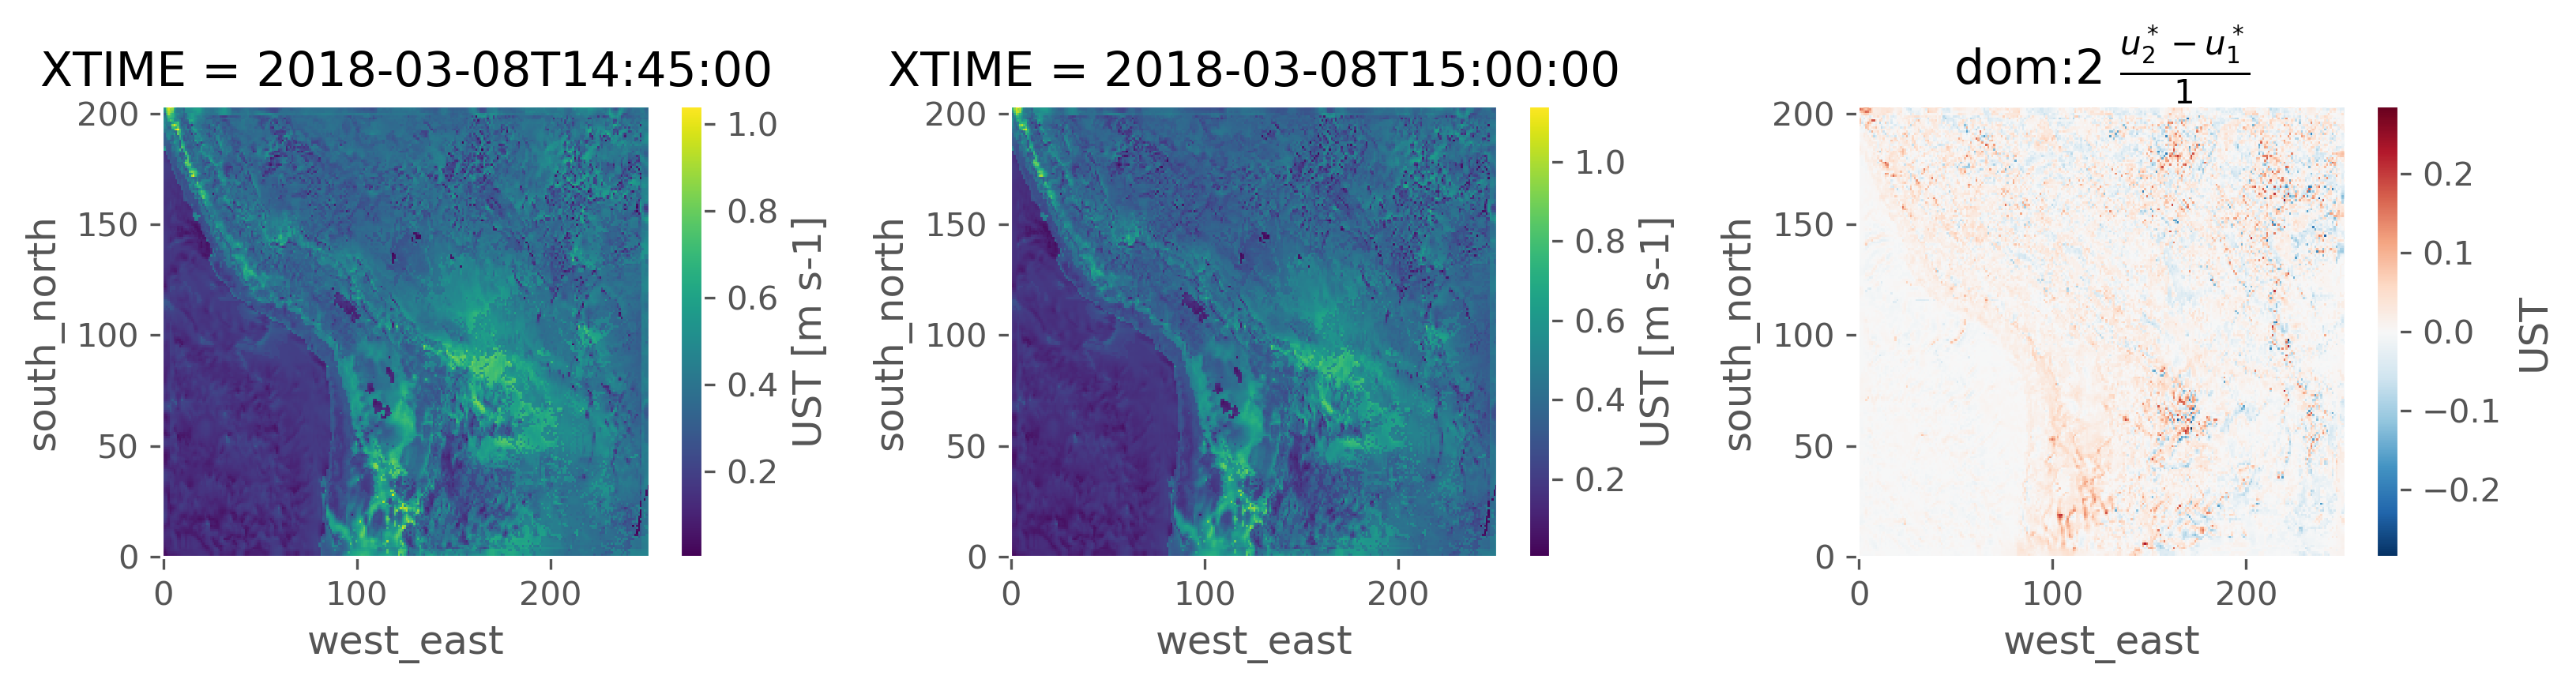

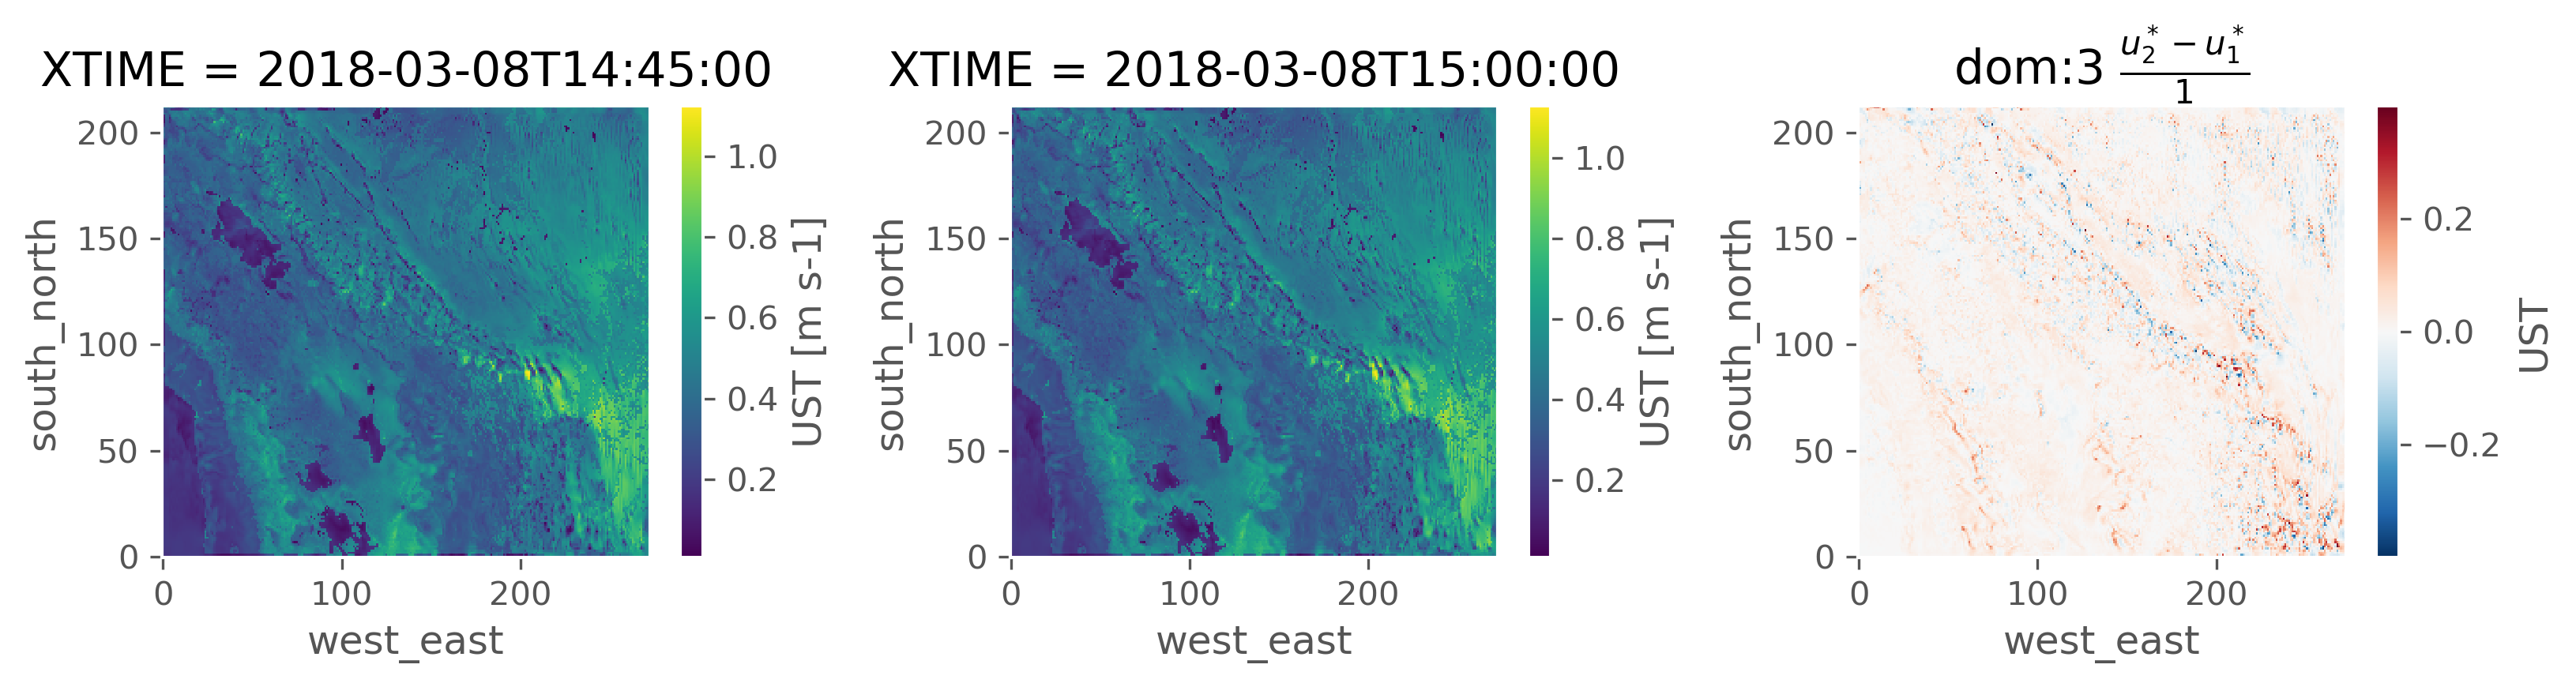

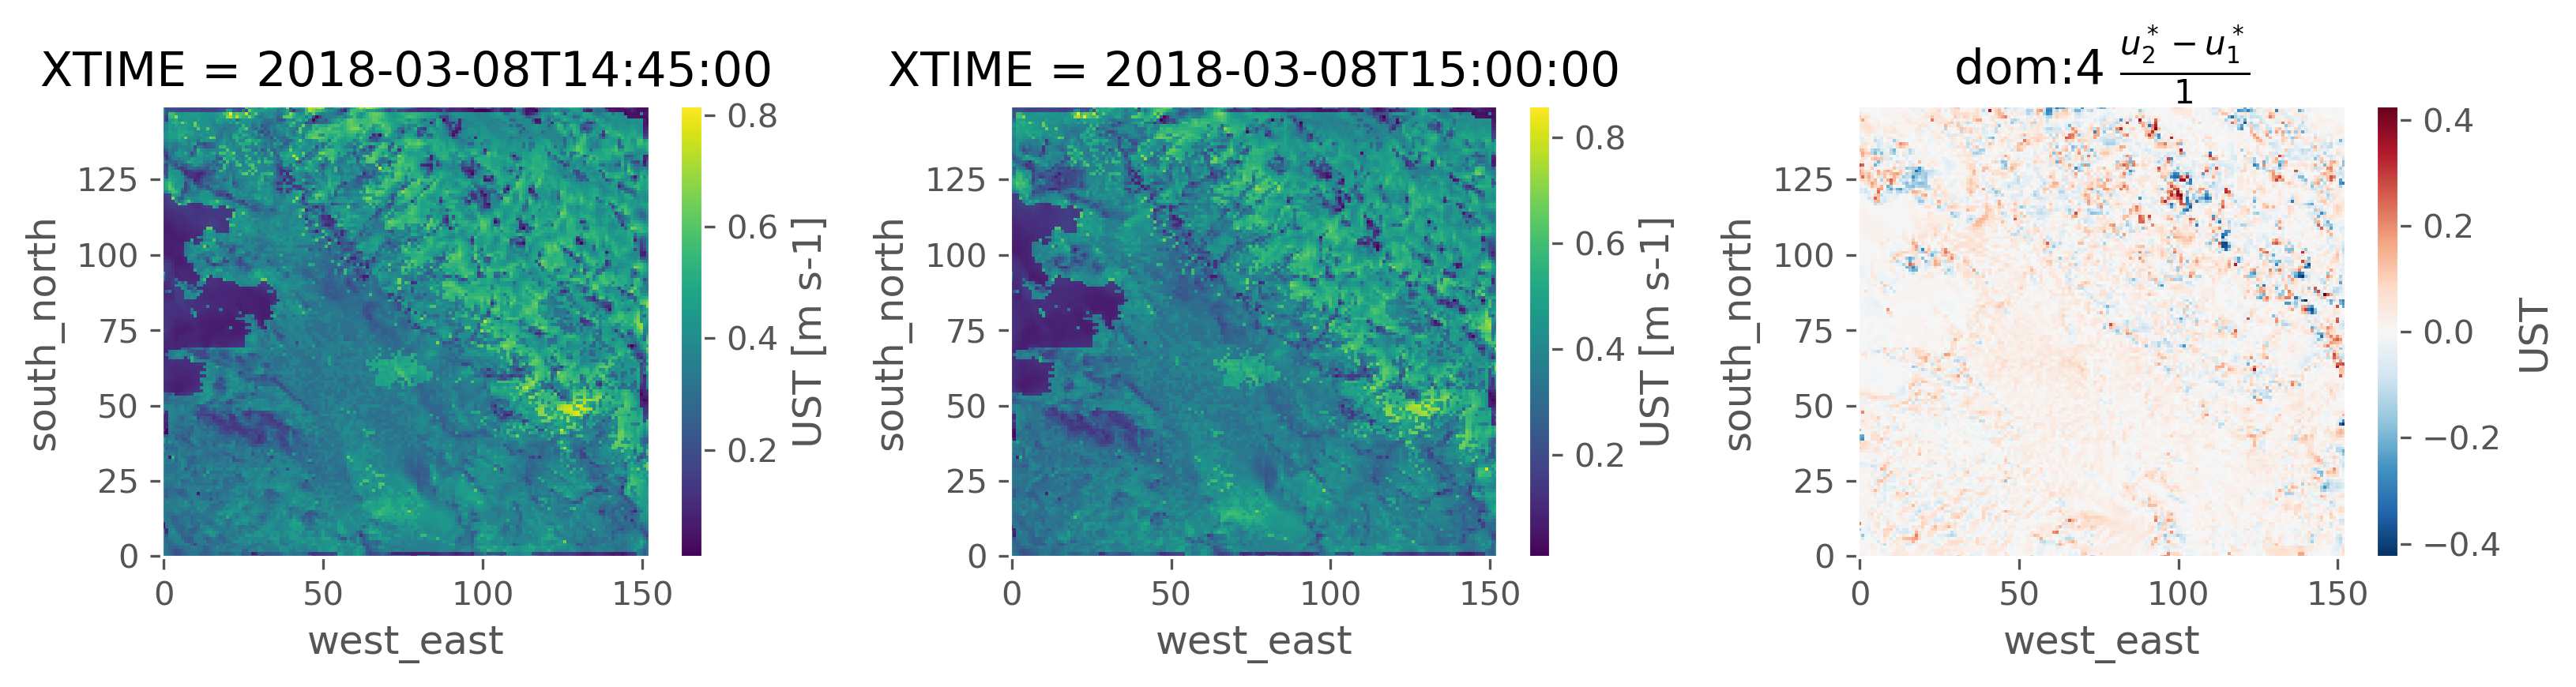

In [478]:
for i in range(1,5):
    _id = i
    _s = slice('2018-03-08 14','2018-03-08 15')
    _wr = wrf_files.loc[(_s,_id),:]

    XTIME = 'XTIME'
    Time = 'Time'
    wds = xr.open_mfdataset(_wr['p'],concat_dim=Time,combine='nested')
    wds = wds.swap_dims({Time:XTIME})
    u1 = wds.loc[{XTIME:'2018-03-08 14:45'}]['UST']
    u2 = wds.loc[{XTIME:'2018-03-08 15:00'}]['UST']
    axs = axsplot(1,3,figsize=(11,3)).flatten()
    u1.plot(ax=axs[0]);
    u2.plot(ax=axs[1]);
    ((u2-u1)).plot(ax=axs[2]);
    axs[2].set_title(f'dom:{i} '+'$\\frac{u^*_2-u^*_1}{1}$');
    axs[2].figure.tight_layout()
    

In [479]:
# !jupyter-nbconvert --to markdown check_restart_issues.ipynb

[NbConvertApp] Converting notebook check_restart_issues.ipynb to markdown
[NbConvertApp] Support files will be in check_restart_issues_files/
[NbConvertApp] Making directory check_restart_issues_files
[NbConvertApp] Writing 13062 bytes to check_restart_issues.md
